In [0]:
                                                          # Header
  
# In the third iteration, the validation accuracy is closely following training accuracy but the validation accuracy needs to be 99.4%


# To achieve this, the following is being incorporated

# 1. Introducing batch normalization before every layer except the first layer.

# 2. Increasing the batch size to 128. 
#    As the batch size increases, accuracy increases.
#    Beyond certaing value of batch size, the accuracy decreases. So setting the batch size to 128.

# 3. Drop out at the last layer is reduced to 0.1
#    At the trasition block, drop out is set to 0.2 but towards the end drop out is reduced to only 0.1

# The number of trainable parameters are less than 15k. So retaining number of kernal and network architecture in tact.


# https://keras.io/

#Statement start with "!" is a command in Colab.
#The following command will quitly install keras python module from python packaging index
#After installing keras, it is being imported

!pip install -q keras
import keras

In [0]:
#numpy is imported with "np" as kind of alias. 
#From here on we can use np instead of numpy.

import numpy as np

#The following would import relevant models and layer. 
#Also, we have imported the mnist data set.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# Load MNIST data set into training data and test set data
# There are 70,000 images with their labels in MNIST dataset.
# Randomly, 60k will be loaded into X_train and their corresponding labels y_train.
# Remaining 10k images will be loaded into X_test and their labels y_test.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


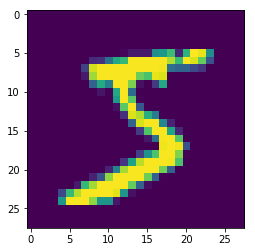

In [0]:
#Printing the shape of Training data set
#From this print statement, there are 60,000 images in X train of size 28X28.
#Correspoindingly, y_train is a column matrics of size 60000

print (X_train.shape)


# Using plt.imshow method from matplot library, the first image is printed. y[0] will be have a value of 5.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Convert the images in training dataset and test set into multidimentional arrays of their pixel intensity values.

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert the pixel intensity values into floating point value and normalize the pixel intensities by dividing with 255. Max value of pixel intensity is 255.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# This will convert the numbers in the Y_train and y_test into column metrics of size 10. Element corresponding to the number will have value 1 and all other elements will be 0.
# For example, 5 will be represented by the column matrics [0,0,0,0,1,0,0,0,0,0]


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#Print first 10 elements in the Y_train after converting into catogorical matrices.

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))#26,3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu'))#24,5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu'))#22,7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, activation='relu'))#22,7
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(2, 2))#11,14

model.add(Convolution2D(8, 3, 3, activation='relu'))#9,16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu'))#7,18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))#7,18
model.add(Dropout(0.1))
model.add(Convolution2D(10, 7))#1,24

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_79 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_92 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_80 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_93 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 22, 22, 32)        4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# 60k images training images will be trained in batches of 32 images at a time. 
# One epoch consists of (60k/32 = 1875) forward propagations followed by one backward propagation
# Network will be trained for 10 epoches and after the training, model will have the weights.


model.fit(X_train, Y_train, batch_size=128, nb_epoch=90, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/90
60000/60000 [==============================] - 11s 181us/step - loss: 0.4212 - acc: 0.8638 - val_loss: 0.0898 - val_acc: 0.9740
Epoch 2/90
60000/60000 [==============================] - 7s 115us/step - loss: 0.0984 - acc: 0.9693 - val_loss: 0.0644 - val_acc: 0.9807
Epoch 3/90
60000/60000 [==============================] - 7s 116us/step - loss: 0.0735 - acc: 0.9770 - val_loss: 0.0537 - val_acc: 0.9847
Epoch 4/90
60000/60000 [==============================] - 8s 126us/step - loss: 0.0612 - acc: 0.9813 - val_loss: 0.0364 - val_acc: 0.9896
Epoch 5/90
60000/60000 [==============================] - 7s 116us/step - loss: 0.0544 - acc: 0.9828 - val_loss: 0.0354 - val_acc: 0.9892
Epoch 6/90
60000/60000 [==============================] - 7s 115us/step - loss: 0.0466 - acc: 0.9856 - val_loss: 0.0314 - val_acc: 0.9901
Epoch 7/90
60000/60000 [==============================] - 7s 115us/step - loss: 0.0439 - acc: 0.9864 - val_loss: 0.0356 -